In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import dufte
#plt.style.use('ggplot')
#plt.style.use('seaborn')
#plt.style.use('fivethirtyeight')
plt.style.use(dufte.style)

# **Casos diarios**: Data product 5.

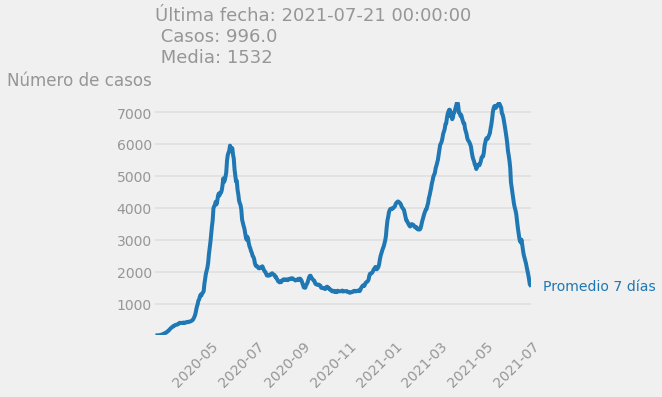

In [10]:
def daily_cases():
    """
    Función que genera plot de casos diarios. Se elimina fecha '2020-06-17'
    dado que presenta un número muy alto de casos. Datos son obtenidos del
    Data product 5. 
    """
    # Se crea data frame.
    path5 = 'D:\Proyectos\Datos-COVID19\output\producto5\TotalesNacionales.csv'
    df = pd.read_csv(path5).transpose()
    df = df.rename(columns={i: df.loc['Fecha', i] for i in range(19)})
    df = df.drop(index=['Fecha'])
    df.index = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in df.index]

    # Se agrega columna de casos diarios.
    df['Casos diarios'] = df['Casos totales'].diff(periods=1)

    # Se elimina '2020-06-17'. 
    df = df.drop(index=[datetime.datetime(2020, 6, 17)])

    # Se agrega columna promedio 7 días para casos diarios.
    n = 7
    df['Casos diarios promedio {} días'.format(n)] = df['Casos diarios'].rolling(window=n).mean()

    # PLoteo de casos diarios.
    #plt.bar(df.index[7:], df['Casos diarios'][7:], color='lightblue')
    plt.plot(df.index[7:], df['Casos diarios promedio 7 días'][7:].values, label='Promedio 7 días')
    plt.xticks(rotation=45)
    plt.title('Última fecha: {} \n Casos: {} \n Media: {}'. format(df.index[-1], df['Casos diarios'][-1], round(df['Casos diarios promedio 7 días'][-1])))
    dufte.ylabel('Número de casos')
    dufte.legend()
    plt.show()

daily_cases()

# **Pacientes COVID-19 en UCI por grupo de edad**: Data product 9

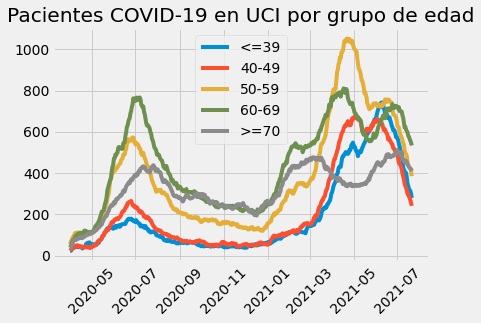

In [3]:
path9 = 'D:\Proyectos\Datos-COVID19\output\producto9\HospitalizadosUCIEtario_T.csv'
edad = pd.read_csv(path9)
edad.index = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in edad['Grupo de edad']]
edad.drop(columns=['Grupo de edad'], inplace=True)
#edad.tail(10)

for grupo in edad.columns:
    plt.plot(edad.index, edad[grupo], label=grupo)

plt.title('Pacientes COVID-19 en UCI por grupo de edad')
plt.legend()
plt.xticks(rotation=45)
plt.show()

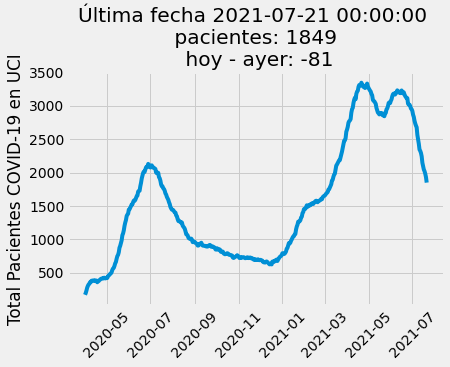

In [4]:
# El agregado (suma sobre los intervalos de edades)
agg = edad.sum(axis=1)
plt.plot(agg.index, agg)
plt.xticks(rotation=45)
plt.ylabel("Total Pacientes COVID-19 en UCI")
plt.title("Última fecha {} \n pacientes: {} \n hoy - ayer: {}".format(agg.index[-1], agg[-1], agg[-1] - agg[len(agg) - 2]))
plt.show()

# **DP10 - Fallecidos con COVID-19 por grupo de edad: Descripción**: Data product 10

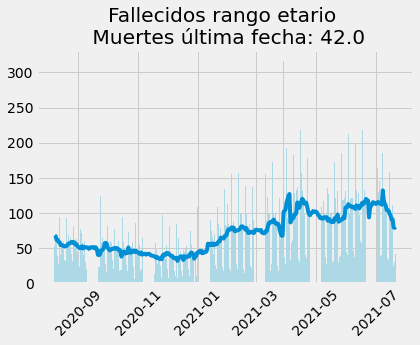

In [5]:
def daily_deaths():
    path10 = 'D:\Proyectos\Datos-COVID19\output\producto10\FallecidosEtario_T.csv'
    fallecidos_etario = pd.read_csv(path10)

    # Poner fechas como index.
    fallecidos_etario.index = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in fallecidos_etario['Grupo de edad']]
    fallecidos_etario.drop(columns=['Grupo de edad'], inplace=True)

    # "Derivar" para encontrar los casos diarios desde los acumulados.
    fallecidos_etario = fallecidos_etario.diff(periods=1)

    rangos =  ['<=39', '40-49', '50-59', '60-69', '70-79', '80-89', '>=90']
    #
    start_date = datetime.datetime(2020, 8, 1)
    #rangos = ['70-79', '80-89']

    #since_start_date = fallecidos_etario[rangos][fallecidos_etario.index >= start_date]
    #plt.bar(since_start_date.index[7:], since_start_date.sum(axis=1)[7:], color='lightblue')
    #plt.plot(since_start_date.index[7:], since_start_date.sum(axis=1).rolling(window=7).mean()[7:])

    fallecidos_etario = fallecidos_etario[rangos][fallecidos_etario.index >= start_date]    

    plt.bar(fallecidos_etario.index[7:], fallecidos_etario.sum(axis=1)[7:], color='lightblue')
    plt.plot(fallecidos_etario.index[7:], fallecidos_etario.sum(axis=1).rolling(window=7).mean()[7:])
    plt.title('Fallecidos rango etario \n Muertes última fecha: {}'.format(fallecidos_etario.sum(axis=1)[-1]))
    plt.xticks(rotation=45)
    plt.show()

daily_deaths()


In [6]:
# A agregar: vacunación y positividad.